In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
from gapminder import gapminder

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [60]:
"""
1. Queremos estudiar la relacion entre la longitud de la aleta de un pinguino y el peso del ping¨uino.
Como en una esfera, el peso es proporcional a la longitud del radio elevada al cubo, podemos
conjeturar que un polinomio de grado 3 es apropiado para ajustar el peso en funcion de la
longitud de la aleta. Queremos verificar si nuestra conjetura tiene sustento en los datos.
(a) Datos faltantes. Ejecutar el siguiente codigo y observar si hay filas con datos faltantes
(NaN).
penguins = sns . load_dataset (" penguins ")
penguins . head ()
Para hacerlo en forma mas sistematica (en lugar de mirar solo algunas filas) podes usar
el siguiente codigo
penguins . isnull () . values .any ()
Para eliminar las filas con valores faltantes aplicamos al DataFrame el metodo dropna().
Eliminar las filas con datos faltantes del DataFrame de ping¨uinos y verificar que el
DataFrame resultante no contiene valores faltantes
"""
penguins = sns.load_dataset ("penguins")
print(penguins . isnull () . values .any ())# consulto si tiene lineas NaN
penguins = penguins.dropna() #saque las filas con datos NaN
penguins . isnull () . values .any () # consulto si tiene lineas NaN. Como es False, ya me quedo trank
penguins.head()

True


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [61]:
"""
(b) Dividir el dataset resultante en un grupo de entrenamiento y uno de test (80% - 20%)
"""
train_set, test_set = train_test_split(penguins, test_size=0.2, random_state=42)
# Mostrar la cantidad de datos en cada conjunto
print("Tamaño del dataset:", len(penguins))
print("Tamaño del conjunto de entrenamiento:", len(train_set))
print("Tamaño del conjunto de prueba:", len(test_set))

Tamaño del dataset: 333
Tamaño del conjunto de entrenamiento: 266
Tamaño del conjunto de prueba: 67


In [62]:
"""
(c) Crear y ajustar 3 modelos utilizando polinomios de grados 1, 2 y 3.
"""

# Preparar los datos
X_train = train_set[['flipper_length_mm']]  # Longitud de la aleta como característica
y_train = train_set['body_mass_g']  # Peso del pingüino como variable objetivo

X_test = test_set[['flipper_length_mm']]
y_test = test_set['body_mass_g']

modelos = []
# Iterar sobre los grados de polinomios
for grado in [1, 2, 3]:
    polynomial_features = PolynomialFeatures(degree=grado)
    X_train_poly = polynomial_features.fit_transform(X_train)
    
    modelo = LinearRegression()
    modelo.fit(X_train_poly, y_train)
    
    modelos.append((grado, modelo))
    
    # Calcular el error cuadrático medio en el conjunto de prueba
    X_test_poly = polynomial_features.transform(X_test)
    y_pred = modelo.predict(X_test_poly)
    ecm = mean_squared_error(y_test, y_pred)
    print(f"Grado del polinomio {grado}: ecm = {ecm}")

# Seleccionar el modelo con el menor error cuadrático medio en el conjunto de prueba
best_degree, best_model = min(modelos, key=lambda x: mean_squared_error(y_test, x[1].predict(PolynomialFeatures(degree=x[0]).fit_transform(X_test))))
print(f"El mejor modelo es un polinomio de grado {best_degree}")


Grado del polinomio 1: MSE = 129886.71972544755
Grado del polinomio 2: MSE = 127731.22567377475
Grado del polinomio 3: MSE = 123664.64922895115
El mejor modelo es un polinomio de grado 3


In [63]:
"""
(d) Calcular para cada uno el error prediccion en el grupo de entrenamiento y en el grupo de
test.
"""
# Calcular el error de predicción en el grupo de entrenamiento y en el grupo de prueba para cada modelo
for grado, modelo in modelos:
    # Predicciones en el conjunto de entrenamiento
    y_train_pred = modelo.predict(PolynomialFeatures(degree=grado).fit_transform(X_train))
    ecm_train = mean_squared_error(y_train, y_train_pred)
    
    # Predicciones en el conjunto de prueba
    y_test_pred = modelo.predict(PolynomialFeatures(degree=grado).fit_transform(X_test))
    ecm_test = mean_squared_error(y_test, y_test_pred)
    
    print(f"Grado del polinomio {grado}:")
    print(f"    ecm en el conjunto de entrenamiento: {ecm_train}")
    print(f"    ecm en el conjunto de prueba: {ecm_test}")


Grado del polinomio 1:
    MSE en el conjunto de entrenamiento: 159873.09549908538
    MSE en el conjunto de prueba: 129886.71972544755
Grado del polinomio 2:
    MSE en el conjunto de entrenamiento: 147737.63110722063
    MSE en el conjunto de prueba: 127731.22567377475
Grado del polinomio 3:
    MSE en el conjunto de entrenamiento: 143995.99465654764
    MSE en el conjunto de prueba: 123664.64922895115


In [68]:
"""
(e) ¿Cual modelo tiene el menor error (ECM) en el ajuste? ¿Cual el menor error (ECM) de
prediccion?
"""

# Encontrar el modelo con el menor error cuadrático medio en el ajuste y en la predicción
for grado, modelo in modelos:
    # Predicciones en el conjunto de entrenamiento
    y_train_pred = modelo.predict(PolynomialFeatures(degree=grado).fit_transform(X_train))
    ecm_train = mean_squared_error(y_train, y_train_pred)
    
    # Predicciones en el conjunto de prueba
    y_test_pred = modelo.predict(PolynomialFeatures(degree=grado).fit_transform(X_test))
    ecm_test = mean_squared_error(y_test, y_test_pred)
    
    # Actualizar el modelo con el menor error cuadrático medio en el ajuste
    if ecm_train < min_ecm_train:
        min_ecm_train = ecm_train
        best_fit_model = (grado, modelo)
    
    # Actualizar el modelo con el menor error cuadrático medio de predicción
    if ecm_test < min_ecm_test:
        min_ecm_test = ecm_test
        best_pred_model = (grado, modelo)

# Imprimir los resultados
print(f"El modelo con el menor error cuadrático medio en el ajuste es un polinomio de grado {best_fit_model[0]} con ecm = {min_ecm_train}")
print(f"El modelo con el menor error cuadrático medio de predicción es un polinomio de grado {best_pred_model[0]} con ecm = {min_ecm_test}")



El modelo con el menor error cuadrático medio en el ajuste es un polinomio de grado 3 con ecm = 143995.99465654764
El modelo con el menor error cuadrático medio de predicción es un polinomio de grado 3 con ecm = 123664.64922895115


In [70]:
"""
(f) En base a los resultados obtenidos, ¿cual de los tres modelos utilizarıa?
"""
"El 3"


'El 3'

ValueError: could not convert string to float: 'New York'

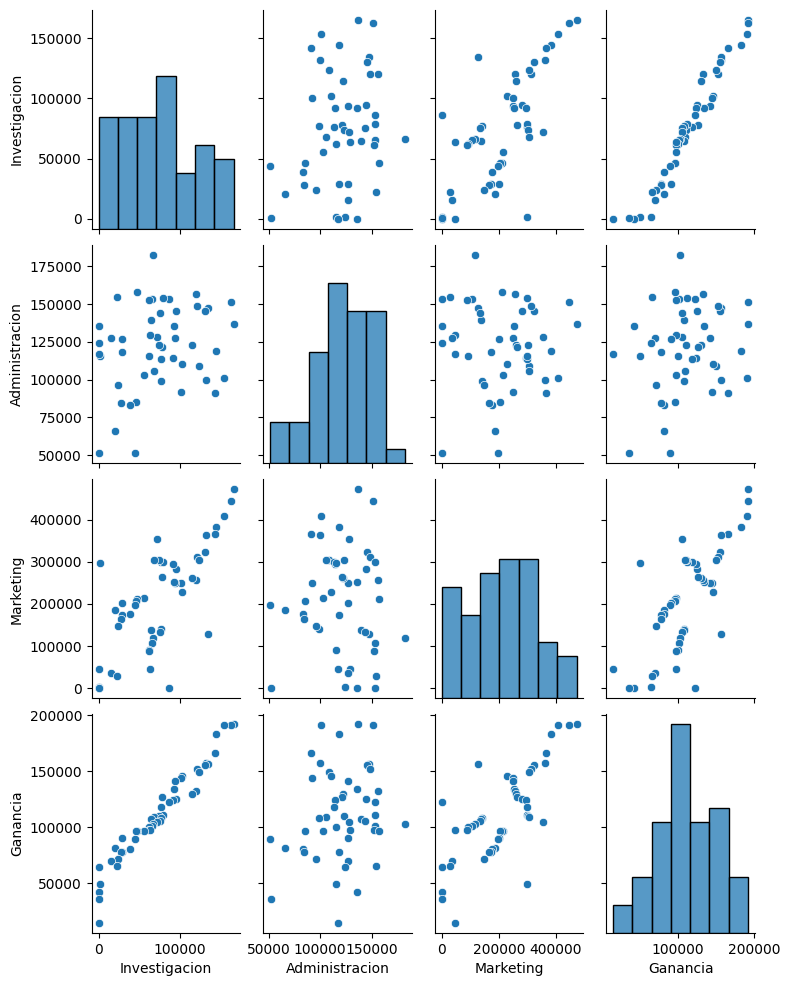

In [77]:
"""
2. En el archivo 50_startups.csv tenemos los siguientes datos de 50 companıas: gastos en
investigacion y desarrollo, gastos administrativos, gastos en marketing y ganancias. Queremos
estimar las ganancias a partir de los gastos en las distintas areas.

(a) Leer el archivo, y realizar un grafico de dispersion para cada par de variables. Se pueden
generar todos los graficos automaticamente con el pairplot.
"""
startups = pd.read_csv('./datos/50_startups.csv')
sns.pairplot(data= startups, aspect=.8)
"""
En base a estos graficos, si quisieramos predecir la ganancia mediante un modelo lineal
utilizando una sola variable predictora, ¿cual variable utilizarıa? Disenar un experimento
para verificar su respuesta
"""

###################
######CHATGPT######
###################

# Paso 1: Cargar los datos y calcular correlaciones
correlations = startups.corr()['Ganancias'].drop('Ganancias')  # Calcula la correlación con las ganancias

# Paso 2: Seleccionar la variable con mayor correlación
best_predictor = correlations.idxmax()  # Selecciona la variable con mayor correlación

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(startups[[best_predictor]], startups['Ganancias'], test_size=0.2, random_state=42)

# Paso 4: Entrenar el modelo lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Paso 5: Evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Visualizar resultados
print("Variable predictora seleccionada:", best_predictor)
print("Coeficiente de correlación con las ganancias:", correlations[best_predictor])
print("Error cuadrático medio (MSE):", mse)
